In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('신뢰성공학 실습 6주차BrakeReliability.xlsx')
data

,ID,Days,Type
0,101,462,1
1,101,730,1
2,112,364,1
3,112,391,1
4,112,548,1
...,...,...,...
74,235,416,2
75,243,93,2
76,243,205,2
77,243,264,2


In [4]:
df = data[['Days', 'Type']]
df

,Days,Type
0,462,1
1,730,1
2,364,1
3,391,1
4,548,1
...,...,...
74,416,2
75,93,2
76,205,2
77,264,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Days    79 non-null     int64
 1   Type    79 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [6]:
df.describe()

,Days,Type
count,79.000000,79.000000
mean,397.594937,1.518987
std,207.967238,0.502832
min,19.000000,1.000000
25%,246.000000,1.000000
50%,419.000000,2.000000
75%,507.000000,2.000000
max,730.000000,2.000000


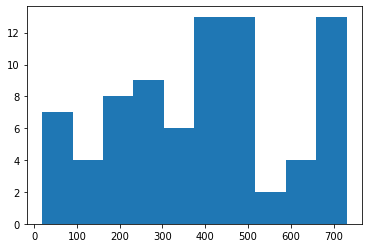

In [7]:
plt.hist(df['Days'])
plt.show()

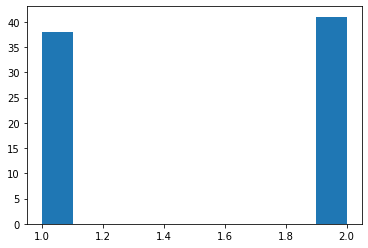

In [8]:
plt.hist(df['Type'])
plt.show()

Type 1
Group 
     Days  Type
0    462     1
1    730     1
2    364     1
3    391     1
4    548     1
5    724     1
6    302     1
7    444     1
8    500     1
9    730     1
10   250     1
11   500     1
12   724     1
13    88     1
14   724     1
15   272     1
16   421     1
17   552     1
18   625     1
19   719     1
20   481     1
21   710     1
22   431     1
23   710     1
24   367     1
25   710     1
26   635     1
27   650     1
28   708     1
29   402     1
30   700     1
31    33     1
32   687     1
33   287     1
34   687     1
35   317     1
36   498     1
37   657     1


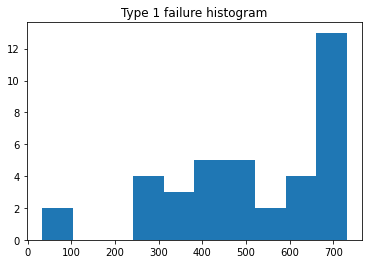

Type 2
Group 
     Days  Type
38   203     2
39   211     2
40   277     2
41   373     2
42   511     2
43   293     2
44   503     2
45   173     2
46   242     2
47   464     2
48    39     2
49    91     2
50   119     2
51   148     2
52   306     2
53   461     2
54   382     2
55   460     2
56   250     2
57   434     2
58   192     2
59   448     2
60   369     2
61   448     2
62    22     2
63   447     2
64    54     2
65   441     2
66   194     2
67   432     2
68    61     2
69   419     2
70    19     2
71   185     2
72   419     2
73   187     2
74   416     2
75    93     2
76   205     2
77   264     2
78   415     2


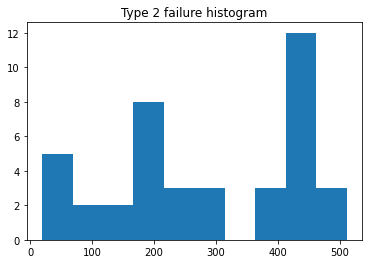

In [9]:
grouped = df.groupby('Type')

for type_,group in grouped:
    print('Type', type_)
    print('Group \n', group)
    plt.hist(group['Days'])
    plt.title('Type {0} failure histogram'.format(type_))
    plt.show()

In [10]:
df

,Days,Type
0,462,1
1,730,1
2,364,1
3,391,1
4,548,1
...,...,...
74,416,2
75,93,2
76,205,2
77,264,2


In [11]:
type1_item = df[df['Type']==1]['Days']
type2_item = df[df['Type']==2]['Days']

type1_item

0     462
1     730
2     364
3     391
4     548
5     724
6     302
7     444
8     500
9     730
10    250
11    500
12    724
13     88
14    724
15    272
16    421
17    552
18    625
19    719
20    481
21    710
22    431
23    710
24    367
25    710
26    635
27    650
28    708
29    402
30    700
31     33
32    687
33    287
34    687
35    317
36    498
37    657
Name: Days, dtype: int64

In [22]:
type2_item.describe()

count     41.000000
mean     284.634146
std      152.521434
min       19.000000
25%      185.000000
50%      277.000000
75%      432.000000
max      511.000000
Name: Days, dtype: float64

In [15]:
type1_mttf = type1_item.describe()['mean']
type2_mttf = type2_item.describe()['mean']

type1_mttf

519.4736842105264

In [17]:
type1_b25 = type1_item.describe()['25%']

type1_b25

393.75

In [21]:
index = ['({0}:{1}]'.format(t,t+50) for t in range(0,750,50)]

cdf = pd.DataFrame(index=index, columns=['Type1','Type2'])

for i,t in zip(cdf.index, range(0,750,50)):
    cdf.loc[i, 'Type1'] = sum(type1_item<t+50)
    cdf.loc[i, 'Type2'] = sum(type2_item<t+50)
    
cdf

,Type1,Type2
(0:50],1,3
(50:100],2,7
(100:150],2,9
(150:200],2,14
(200:250],2,18
(250:300],5,22
(300:350],7,23
(350:400],10,26
(400:450],14,36
(450:500],17,39


In [23]:
t = range(0,800,50)

type1_Ft = [0] + [x/len(type1_item) for x in cdf['Type1']]
type2_Ft = [0] + [x/len(type2_item) for x in cdf['Type2']]

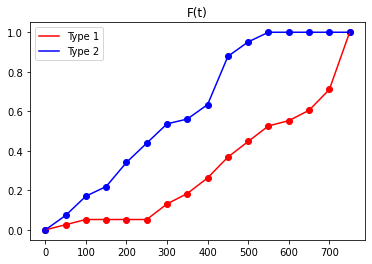

In [25]:
plt.plot(t, type1_Ft, color = 'r', label='Type 1')
plt.plot(t, type2_Ft, color = 'b', label='Type 2')

plt.scatter(t, type1_Ft, color='r')
plt.scatter(t, type2_Ft, color='b')

plt.title('F(t)')
plt.legend()
plt.show()

In [26]:
t = range(0,800,50)

type1_Rt = [1] + [1-x/len(type1_item) for x in cdf['Type1']]
type2_Rt = [1] + [1-x/len(type2_item) for x in cdf['Type2']]

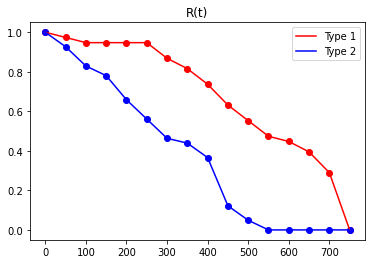

In [27]:
plt.plot(t, type1_Rt, color = 'r', label='Type 1')
plt.plot(t, type2_Rt, color = 'b', label='Type 2')

plt.scatter(t, type1_Rt, color='r')
plt.scatter(t, type2_Rt, color='b')

plt.title('R(t)')
plt.legend()
plt.show()

In [32]:
t = [t_+25 for t_ in range(0,750,50)]

type1_ft = [cdf.iloc[0,0]/(len(type1_item)*50)]
for i in range(1, len(cdf.index)):
    type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/len(type1_item*50))
    
type2_ft = [cdf.iloc[0,1]/(len(type2_item)*50)]
for i in range(1, len(cdf.index)):
    type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/len(type1_item*50))

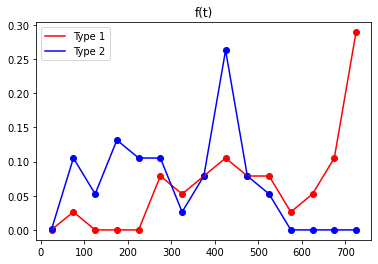

In [33]:
plt.plot(t, type1_ft, color = 'r', label='Type 1')
plt.plot(t, type2_ft, color = 'b', label='Type 2')

plt.scatter(t, type1_ft, color='r')
plt.scatter(t, type2_ft, color='b')

plt.title('f(t)')
plt.legend()
plt.show()

In [41]:
t = [t_+25 for t_ in range(0,750,50)]

type1_failure = 0
type1_ht = [cdf.iloc[0,0]/((len(type1_item)-type1_failure)*50)]
for i in range(1,len(cdf.index)):
    type1_ht.append((cdf.iloc[i,0]- cdf.iloc[i-1,0])/
                    ((len(type1_item)-type1_failure)*50))
    type1_failure += cdf.iloc[i,0] - cdf.iloc[i-1,0]
    print(type1_ht)
    print(type1_failure)
   
type2_failure = 0
type2_ht = [cdf.iloc[0,1]/((len(type2_item)-type2_failure)*50)]
for i in range(1,len(cdf.index)):
    type2_ht.append((cdf.iloc[i,1]- cdf.iloc[i-1,1])/
                    ((len(type2_item)-type2_failure)*50))
    type2_failure += cdf.iloc[i,1] - cdf.iloc[i-1,1]

[0.0005263157894736842, 0.0005263157894736842]
1
[0.0005263157894736842, 0.0005263157894736842, 0.0]
1
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0]
1
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0]
1
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215]
4
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215, 0.001176470588235294]
6
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215, 0.001176470588235294, 0.001875]
9
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215, 0.001176470588235294, 0.001875, 0.002758620689655172]
13
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215, 0.001176470588235294, 0.001875, 0.002758620689655172, 0.0024]
16
[0.0005263157894736842, 0.0005263157894736842, 0.0, 0.0, 0.0, 0.0016216216216216215, 0.001176470588235294, 0.001875, 0.002758620689655172, 0.0024, 0.002727272727272727

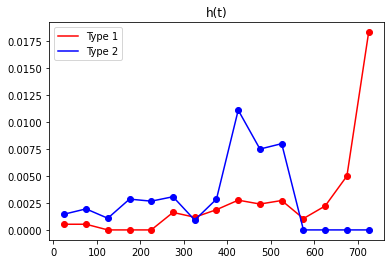

In [40]:
plt.plot(t, type1_ht, color = 'r', label='Type 1')
plt.plot(t, type2_ht, color = 'b', label='Type 2')

plt.scatter(t, type1_ht, color='r')
plt.scatter(t, type2_ht, color='b')

plt.title('h(t)')
plt.legend()
plt.show()